In [33]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import time
import warnings
import matplotlib as mpl
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
torch.cuda.is_available()

True

In [34]:
train_all = pd.read_csv('train.csv')
test_all = pd.read_csv('test.csv')

train_all.drop(['Id'], axis=1, inplace=True)
test_all.drop(['Id'], axis=1, inplace=True)

In [35]:
train_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
test_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [37]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [38]:
train_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


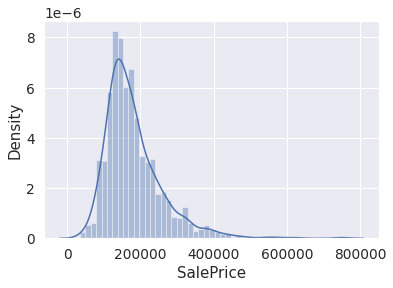

In [39]:
sns.distplot(train_all['SalePrice'])

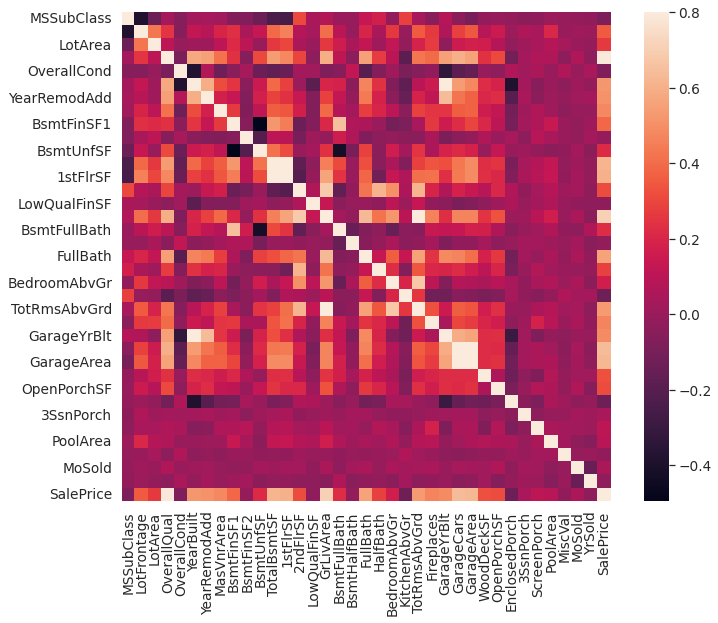

In [40]:
#correlation matrix
corrmat = train_all.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

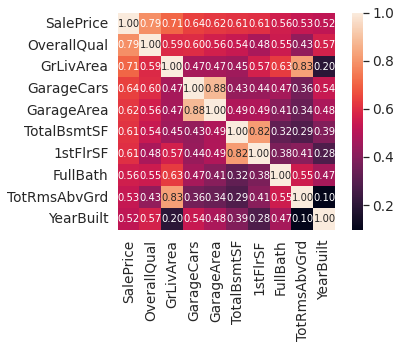

In [41]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_all[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [42]:
corrmat = train_all.corr()
corrmat["SalePrice"].sort_values(ascending=False)



SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

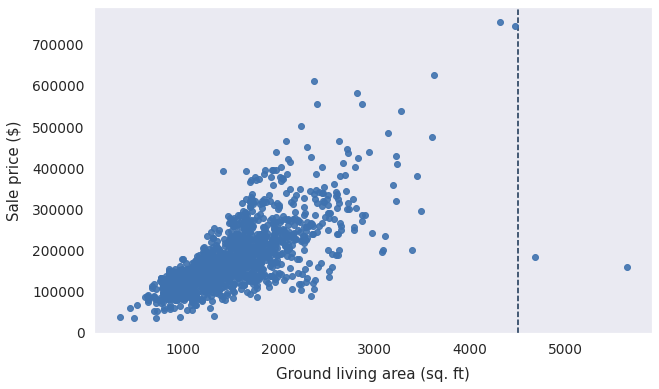

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(train_all["GrLivArea"], train_all["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4500, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

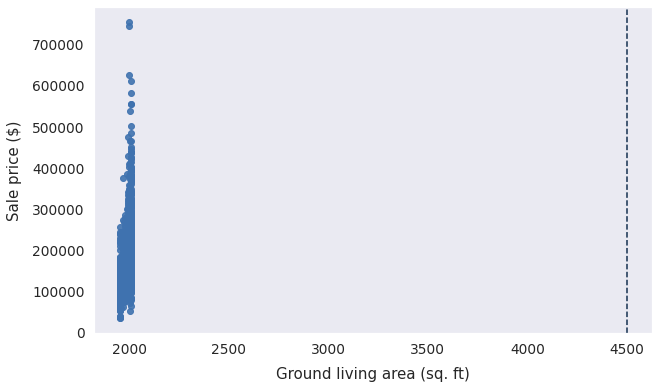

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(train_all["YearRemodAdd"], train_all["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4500, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

In [45]:
train_all = train_all[train_all.GrLivArea < 4500]
test_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [46]:
total = test_all.isna().sum().sort_values(ascending=False)
# concatenate this data into dataframe
missing_data = pd.concat([total], axis=1, keys=["Total"])
missing_data.head(45)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageFinish,78
GarageQual,78
GarageCond,78


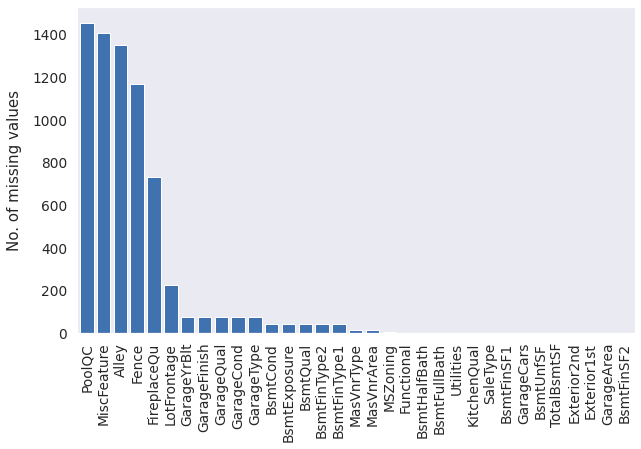

In [47]:
total = total[total > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(total.index, total.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(total) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [48]:
missing_data.Total

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Name: Total, Length: 79, dtype: int64

In [49]:
train_all = train_all.drop(missing_data[missing_data.Total > 0 ].index, axis=1)

In [50]:
test_all = test_all.dropna(axis=1)

In [51]:
train_all.isna().sum().sort_values(ascending=False)[train_all.isna().sum().sort_values(ascending=False) > 0]


Electrical    1
dtype: int64

In [52]:
test_all = test_all.drop(["Electrical"], axis=1)
train_all = train_all.drop(["Electrical"], axis=1)

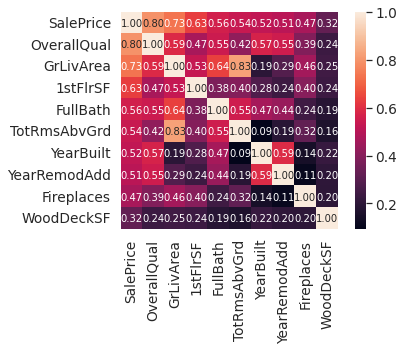

In [53]:
#saleprice correlation matrix
corrmat = train_all.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_all[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [54]:
# full_dataset = pd.concat([train_all, test_all], axis=0)
# full_dataset = pd.get_dummies(full_dataset)

In [ ]:
train_all = pd.get_dummies(train_all)
test_all = test_all.reindex(columns = train_all.columns, fill_value=0)

In [ ]:
test_all

In [ ]:
test_all = test_all.drop(["SalePrice"], axis=1)

In [57]:
train_all.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

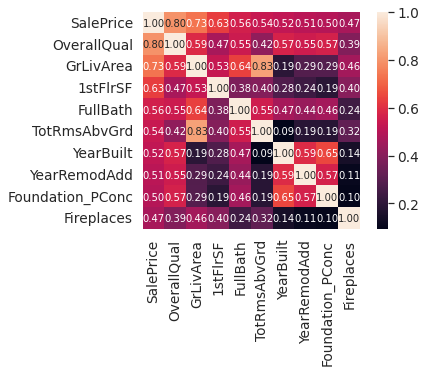

In [59]:
#saleprice correlation matrix
corrmat = train_all.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_all[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

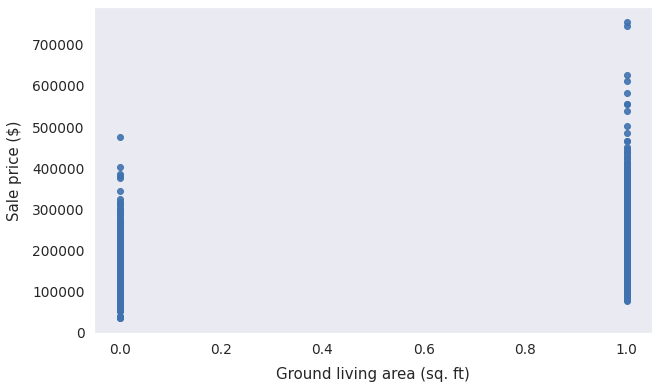

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(train_all["Foundation_PConc"], train_all["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.Sequential([
    keras.layers.Dense(16, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(128, activation='elu'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=20)

Epoch 1/20
46/46 [==============================] - 1s 4ms/step - loss: 38957600768.0000
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 37605236736.0000
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 32384450560.0000
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 22279022592.0000
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 12236102656.0000
Epoch 6/20
46/46 [==============================] - 0s 4ms/step - loss: 8373795840.0000
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 7497647104.0000
Epoch 8/20
46/46 [==============================] - 0s 4ms/step - loss: 7217106944.0000
Epoch 9/20
46/46 [==============================] - 0s 4ms/step - loss: 6957324800.0000
Epoch 10/20
46/46 [==============================] - 0s 4ms/step - loss: 6671228416.0000
Epoch 11/20
46/46 [==============================] - 0s 4ms/step - loss: 6724956672.0000
Epoch 12/20
46/46 [======

In [ ]:
X_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Electrical_SBrkr,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,856,854,0,...,1,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,1262,0,0,...,1,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,920,866,0,...,1,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,961,756,0,...,1,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
X_test = X_test.drop(["SalePrice"], axis=1)

In [ ]:
X_test.isnull().sum().sort_values(ascending=False)

Id                       0
RoofMatl_CompShg         0
HouseStyle_SLvl          0
RoofStyle_Flat           0
RoofStyle_Gable          0
                        ..
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
SaleCondition_Partial    0
Length: 154, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
regressor = LinearRegression()
regressor.fit(X, y)
# regressor.score(X_val, y_val)

LinearRegression()

In [ ]:
y_preds = regressor.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[204056.22],
       [200679.69],
       [219109.19],
       ...,
       [193308.95],
       [204679.2 ],
       [198053.78]], dtype=float32)

In [ ]:
prediction = pd.DataFrame(y_pred, columns=['SalePrice'])

prediction["Id"] = pd.read_csv('./test.csv')["Id"]

prediction.to_csv("./submit.csv", index=False, header=True)


# .to_csv('submit.csv')
# prediction

In [ ]:
test_pred = model.predict(X[:5])
test_pred

array([[204056.22],
       [200679.69],
       [219109.19],
       [193530.66],
       [262466.97]], dtype=float32)

In [ ]:
y[:5]

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64